In [1]:
import pandas as pd
import numpy as np

import networkx as nx
from networkx.algorithms import community
import community as community_louvain

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
nltk.download('wordnet')
nltk.download('punkt')
import re
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
#import community as lvcm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# df = pd.read_csv("Data_ngasal.csv")
df = pd.read_excel("ALLKPOP.xlsx")
df

Date Username From  ... retweet_count favorite_count
0    2021-06-16 04:16:59  ellieedward7  ...          2014              0
1    2021-06-16 04:16:59  ellieedward7  ...          2014              0
2    2021-06-16 04:16:59  ellieedward7  ...          2014              0
3    2021-06-16 04:16:58  ellieedward7  ...          8216              0
4    2021-06-16 04:16:57    EdrielleJK  ...            15              0
...                  ...           ...  ...           ...            ...
6778 2021-06-11 02:33:25     DotsNCuts  ...             0              1
6779 2021-06-11 02:33:25     DotsNCuts  ...             0              1
6780 2021-06-11 02:33:25     DotsNCuts  ...             0              1
6781 2021-06-11 02:33:25     DotsNCuts  ...             0              1
6782 2021-06-09 10:17:59   TanuTahmina  ...             0              0

[6783 rows x 8 columns]

In [3]:
df.shape

(6783, 8)

In [4]:
#dropduplicate
df = df.drop_duplicates(keep='first')
df.shape

(6772, 8)

## Create Graph

In [5]:
#create graph
kpop_graph = nx.Graph(directed=False)
kpop_graph = nx.from_pandas_edgelist(df,source='Username From',target='Mention')

#info nodes and edges from the graph
print(nx.info(kpop_graph))

Name: 
Type: Graph
Number of nodes: 4212
Number of edges: 5284
Average degree:   2.5090


about spring_layout

https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html

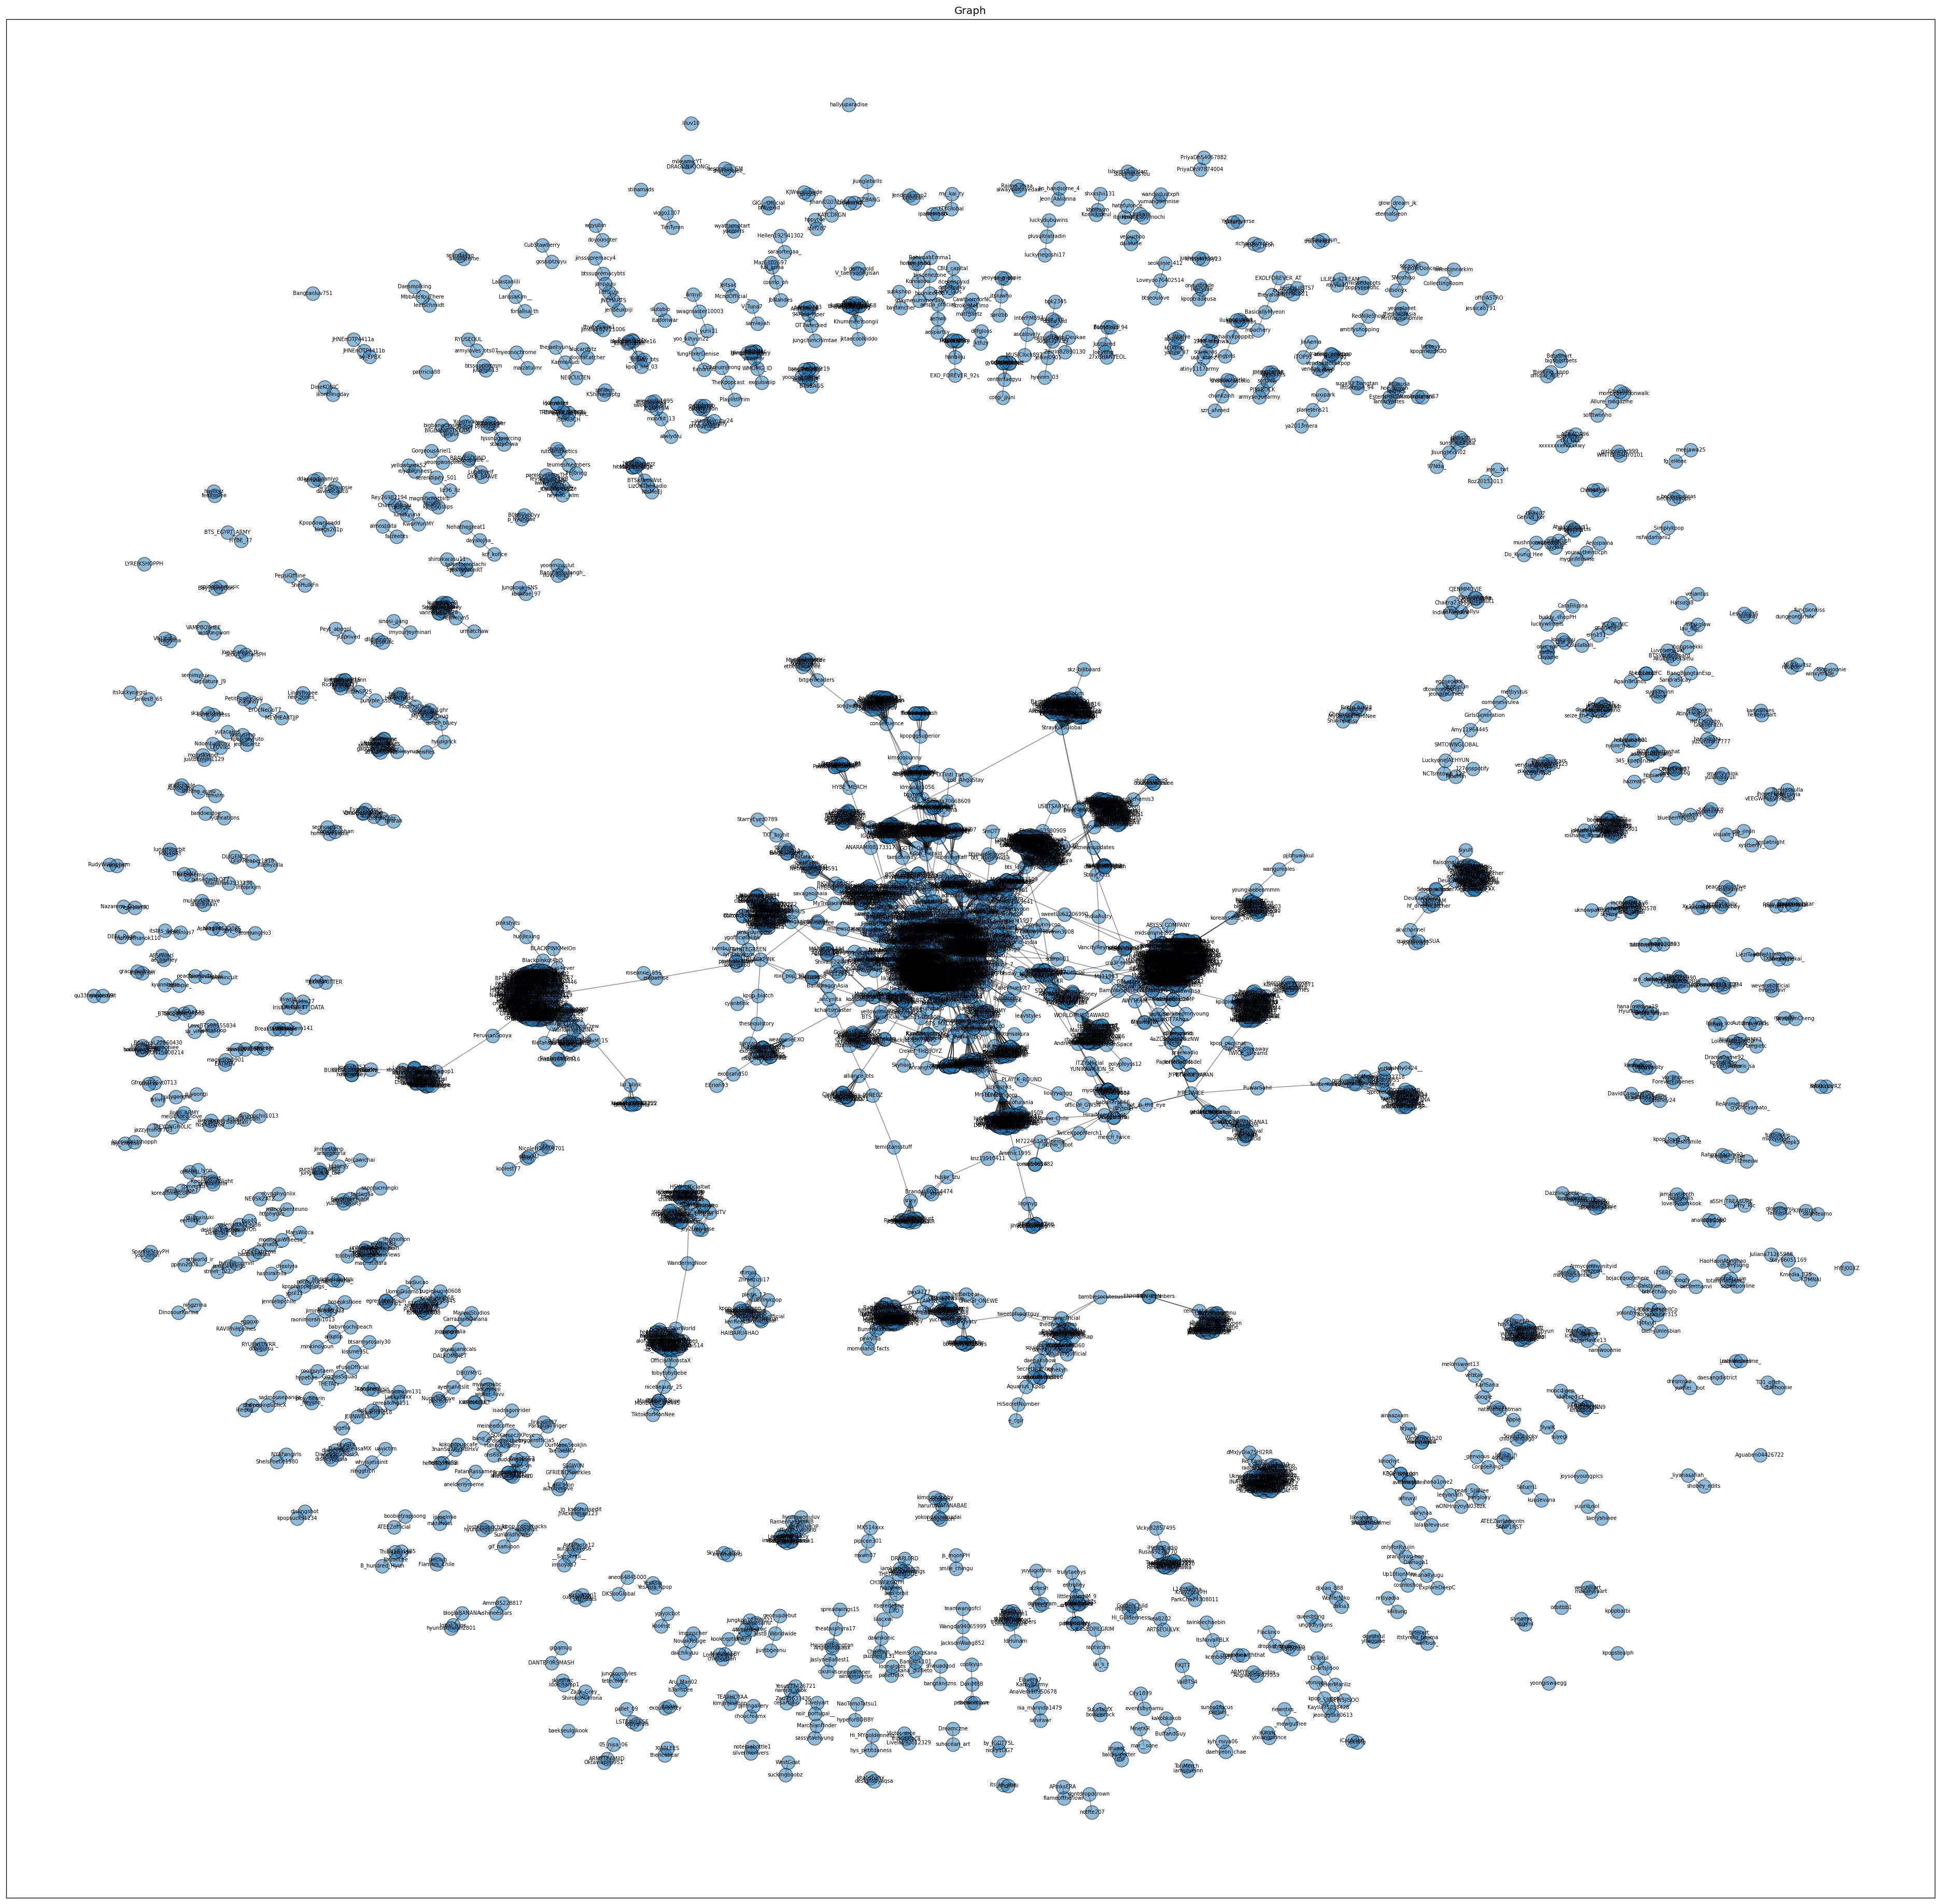

In [6]:
# draw the graph
pos = nx.spring_layout(kpop_graph,iterations=50)
f, ax = plt.subplots(dpi=120, figsize=(40, 40))
ax.set_title('Graph')

nodes = nx.draw_networkx_nodes(kpop_graph, pos, alpha=0.5, node_size=250)
nodes.set_edgecolor('k')

nx.draw_networkx_labels(kpop_graph, pos, font_size=6)
nx.draw_networkx_edges(kpop_graph, pos, width=1.0, alpha=0.4)

## Community Detection (LOUVAIN)

In [7]:
# compute the best partition
# Compute the partition of the graph nodes which maximises the modularity (or try..) using the Louvain heuristices
# This is the partition of highest modularity, i.e. the highest partition of the dendrogram generated by the Louvain algorithm.
partition = community_louvain.best_partition(graph=kpop_graph, partition=None, resolution=1., randomize=True)

max_k_w = []
for com in set(partition.values()):
    list_nodes = [nodes for nodes in partition.keys()
                  if partition[nodes] == com]
    max_k_w = max_k_w + [list_nodes]

max_k_w

[['ellieedward7',
  'bts_love_myself',
  'Hobichekuarahy',
  'sugatakemymoney',
  'ChartsKR',
  'taesoothe',
  'namjooniesrm',
  'frutxxy',
  'sevenjournei',
  'madein_20130613',
  'lak_bts',
  'omg_itspurple',
  'KKimfiki8',
  'taetaeSru',
  'MoonUnturd',
  'dearest_yoongi',
  'Ashlym_11',
  'FerJeon15',
  'papitas0613',
  'shadowbts7_',
  'jjmblue',
  'morningKall',
  'ipsyoongi',
  'LK93ARMY',
  'mnemethyst',
  'riaemiscaria',
  'vvvssshhhiii',
  'myonlyTAEger',
  'AddyUc_',
  'AleeeCriollo03',
  'istantannies7',
  'bangtanupdate97',
  'tania0124',
  'YiyiLVI',
  'JjkookieTrix',
  'chaebuzztin',
  '___emmaxa',
  'mjaiichh',
  'ElsaNov53580909',
  'USBTSARMY',
  'patel_mubassira',
  'Anisahchoi',
  'ChoudharyManya2',
  'ktaefy',
  'ASagaraya',
  'JunkiNunmi',
  'analog_snail',
  'taeisagoodboii',
  'ilagustd',
  'Aaslibtsarmy',
  'vsualkims',
  'nkksskkk',
  'ZuhodChin',
  'jjkmacity',
  'bangtan2097',
  'triviajune',
  'Maggie89513189',
  '05s__p',
  'valeria_yadhir',
  'oohdejavu',

In [8]:
community_num_group = len(max_k_w)
print(community_num_group)

498


In [9]:
#Compute the modularity of a partition of a graph
print(community_louvain.modularity(partition, kpop_graph))

0.8784787327346457


In [10]:
node_mapping = {}
map_v = 0
for node in kpop_graph.nodes():
    node_mapping[node] = map_v
    map_v += 1

print(node_mapping)

{'ellieedward7': 0, 'modooborahae': 1, 'halsey': 2, 'BTS_twt': 3, 'bts_love_myself': 4, 'EdrielleJK': 5, 'KimNamjoon00_': 6, 'kingtanPTW': 7, 'kpopidol_en': 8, 'prdsatk': 9, 'WORLDMUSICAWARD': 10, 'CuriHeydi': 11, 'OT7IsTheBest_': 12, 'billboardcharts': 13, 'goldenoneJK': 14, 'Hobichekuarahy': 15, 'sugatakemymoney': 16, 'ChartsKR': 17, '2000VANTE': 18, '_ma1c0': 19, 'daesangdistrict': 20, 'pi_garabenta': 21, 'BTSMYLIGHTS3': 22, 'BIGHIT_MUSIC': 23, 'LunaJeannilet': 24, 'BTS_MXCO': 25, 'swaanjis': 26, 'BTSupdate_7': 27, 'iambeckyg': 28, 'exquisitejimi': 29, 'dolce_vid': 30, 'ifra_jamal': 31, 'JeniferSarmie20': 32, 'BTS_jp_official': 33, 'HopeWorldJJK': 34, 'here_forBTS': 35, 'handseokj': 36, 'ButterB30108184': 37, 'SwtSpringDay613': 38, 'AnizRadilla': 39, 'Haile_Micha': 40, 'BangtanINDIA': 41, 'tannies_rach07': 42, 'Nam_rachel024': 43, 'taesoothe': 44, 'jaxquesriego': 45, 'street_127': 46, 'namjooniesrm': 47, 'yesskyliee': 48, 'gabriellagrey21': 49, '_im8out': 50, 'frutxxy': 51, 'mimitia

In [11]:
# color
color_list_community = [[] for i in range(len(kpop_graph.nodes()))]
for i in kpop_graph.nodes():
    for j in range(community_num_group):
        if i in max_k_w[j]:
            color_list_community[node_mapping[i]] = j

print(color_list_community)

[0, 1, 1, 2, 0, 2, 2, 3, 3, 4, 4, 5, 5, 5, 1, 0, 0, 0, 6, 6, 7, 1, 8, 8, 2, 2, 1, 1, 1, 9, 9, 1, 6, 6, 3, 1, 3, 2, 2, 2, 10, 10, 2, 2, 0, 11, 11, 0, 1, 1, 4, 0, 1, 1, 2, 2, 6, 6, 2, 6, 0, 1, 13, 13, 13, 1, 1, 4, 1, 1, 14, 14, 6, 0, 15, 15, 0, 6, 6, 6, 0, 4, 4, 4, 2, 9, 9, 6, 0, 0, 1, 2, 0, 16, 16, 2, 1, 4, 1, 1, 3, 2, 2, 1, 17, 17, 5, 5, 5, 5, 5, 5, 5, 5, 18, 18, 0, 9, 16, 1, 1, 6, 3, 15, 4, 6, 6, 2, 4, 1, 1, 2, 19, 19, 4, 2, 0, 1, 1, 1, 0, 14, 0, 4, 20, 20, 0, 2, 2, 0, 0, 0, 21, 21, 0, 22, 22, 6, 1, 2, 2, 8, 8, 1, 2, 0, 23, 23, 24, 24, 4, 3, 0, 2, 0, 0, 13, 13, 0, 6, 0, 3, 6, 1, 0, 2, 2, 2, 1, 2, 1, 6, 25, 25, 0, 2, 26, 26, 1, 27, 27, 2, 2, 1, 8, 8, 0, 2, 6, 28, 28, 1, 0, 1, 4, 29, 29, 1, 30, 30, 6, 2, 1, 1, 6, 6, 2, 2, 8, 31, 31, 28, 13, 13, 4, 0, 1, 6, 32, 32, 3, 2, 9, 0, 1, 0, 2, 33, 33, 2, 2, 2, 0, 1, 4, 2, 1, 2, 2, 1, 1, 2, 34, 1, 1, 4, 1, 1, 0, 6, 4, 16, 35, 35, 6, 4, 36, 36, 2, 1, 1, 1, 2, 6, 2, 37, 37, 0, 1, 2, 2, 6, 38, 38, 39, 39, 4, 3, 1, 0, 3, 2, 0, 40, 40, 41, 41, 28, 0, 

In [12]:
import collections
from collections import Counter
 
occurrences = collections.Counter(color_list_community)
occurrences.most_common(10)

[(2, 586),
 (52, 298),
 (261, 235),
 (1, 188),
 (0, 132),
 (5, 121),
 (244, 90),
 (8, 85),
 (98, 80),
 (165, 79)]

In [13]:
print(pos)

{'ellieedward7': array([0.02817819, 0.08073135]), 'modooborahae': array([0.00784578, 0.07982907]), 'halsey': array([0.01653737, 0.0519364 ]), 'BTS_twt': array([-0.01578227,  0.03219031]), 'bts_love_myself': array([0.0748556 , 0.13208383]), 'EdrielleJK': array([-0.02353926, -0.02313273]), 'KimNamjoon00_': array([-0.03088832, -0.05765056]), 'kingtanPTW': array([ 0.31289473, -0.04217358]), 'kpopidol_en': array([ 0.29783258, -0.0213341 ]), 'prdsatk': array([ 0.15130122, -0.06292476]), 'WORLDMUSICAWARD': array([ 0.13591023, -0.03736582]), 'CuriHeydi': array([0.02096262, 0.10304184]), 'OT7IsTheBest_': array([0.0542092 , 0.10776901]), 'billboardcharts': array([0.03927979, 0.10578517]), 'goldenoneJK': array([-0.00124806,  0.05648047]), 'Hobichekuarahy': array([0.10290947, 0.1467232 ]), 'sugatakemymoney': array([ 0.12672302, -0.01299203]), 'ChartsKR': array([0.10364843, 0.00171394]), '2000VANTE': array([ 0.06237202, -0.07528264]), '_ma1c0': array([ 0.04185617, -0.04952068]), 'daesangdistrict': 

<Figure size 2880x2880 with 0 Axes>

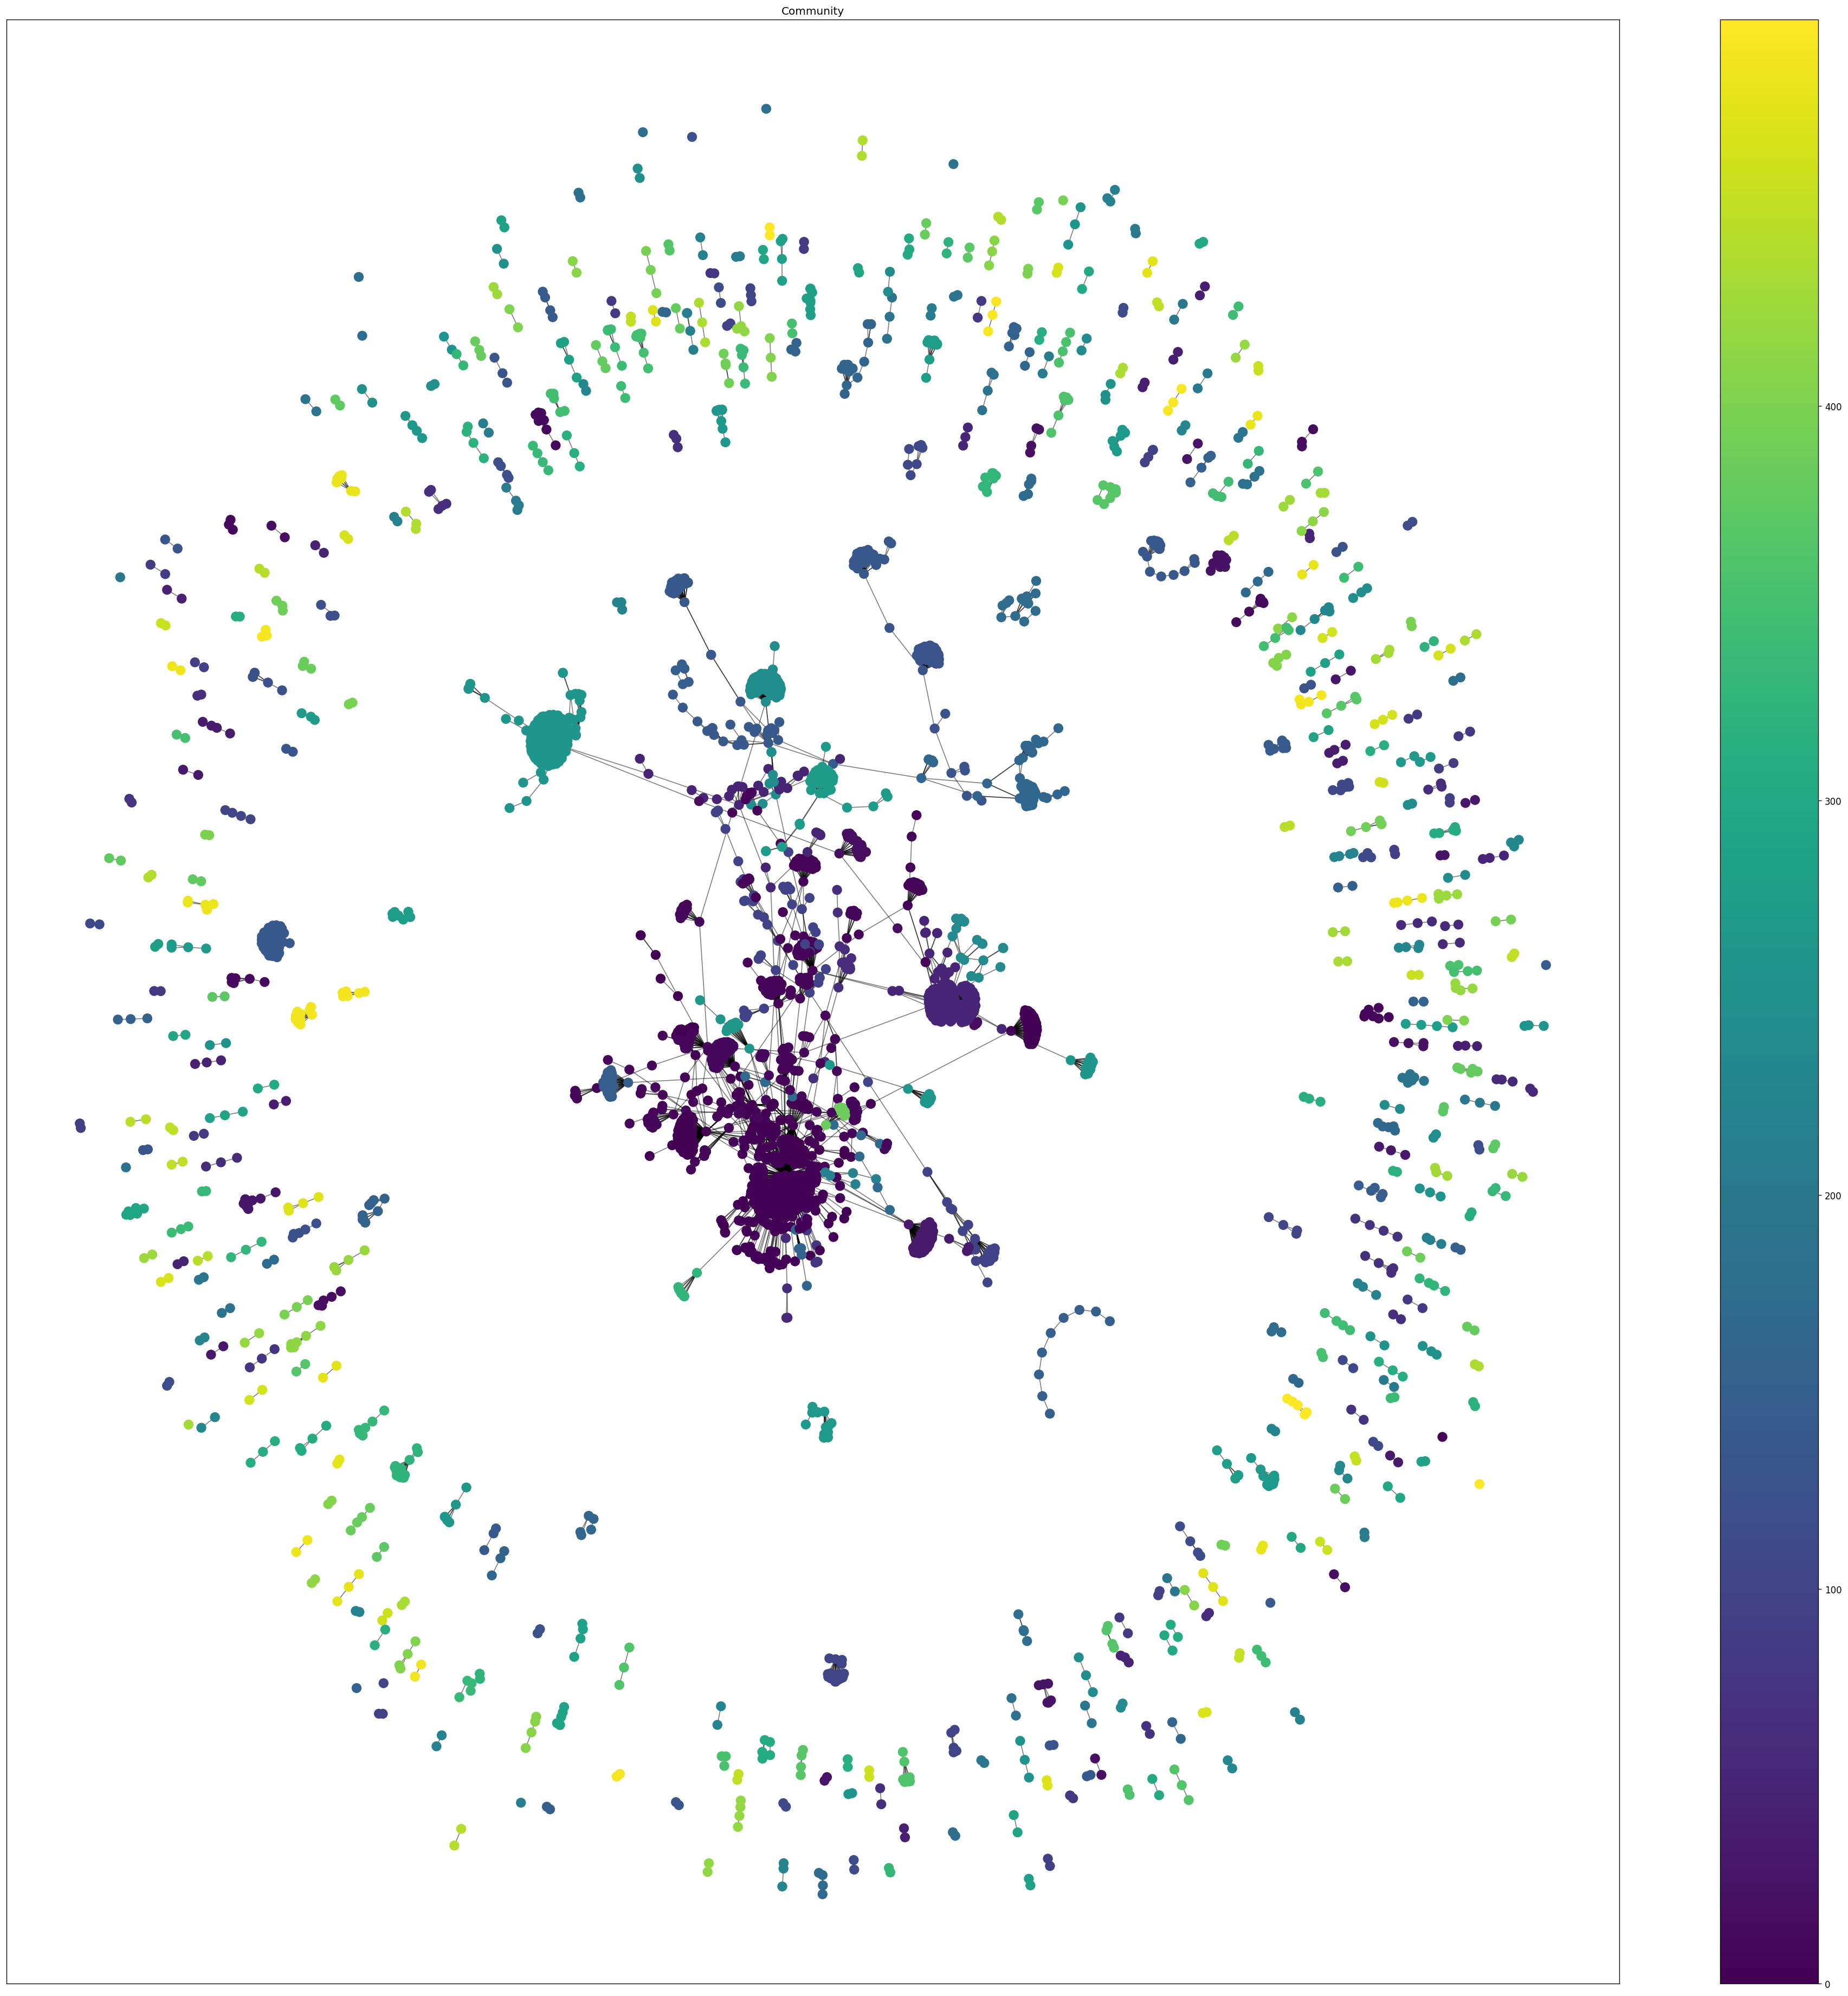

In [14]:
pos = nx.spring_layout(kpop_graph)
fig = plt.figure(figsize=(40, 40))
f, ax = plt.subplots(dpi=120, figsize=(40, 40))
ax.set_title('Community')

edges = kpop_graph.edges()
Feature_color_sub = color_list_community
node_size = 100
im = nx.draw_networkx_nodes(kpop_graph, pos, node_size=node_size, node_color=Feature_color_sub, cmap='viridis', vmin=0, vmax=community_num_group)
nx.draw_networkx_edges(kpop_graph, pos, alpha=0.5)
# nx.draw_networkx_labels(kpop_graph, pos, font_size=0.5, font_color="black")
plt.colorbar(im)
# plt.show

In [15]:
# pos = nx.spring_layout(kpop_graph)
# f, ax = plt.subplots(dpi=120, figsize=(40, 40))
# ax.set_title('Community')

# # color the nodes according to their partition
# cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

# nx.draw_networkx_nodes(kpop_graph, pos, partition.keys(), node_size=100, node_color=list(partition.values()))
# nx.draw_networkx_edges(kpop_graph, pos, alpha=0.5)


## Pre-Processing

In [16]:
def remove(tweet):
    tweet = tweet.replace('&lt;', ' ').replace('&gt;', ' ').replace('&amp;',' ').replace('&lrm;',' ')
    tweet = tweet.replace('&rsquo;',' ').replace('&lsquo;',' ').replace('&ldquo;',' ').replace('&rdquo;',' ')
    tweet = tweet.replace('&ndash;',' ').replace('&mdash;',' ').replace('&nbsp;',' ')
    
    # remove b'
    tweet = re.sub(r'b[\s]+', ' ', tweet)
    
    #remove mention
    tweet = re.sub('@[^\s]+', '', tweet)
    tweet = re.sub(r'\\[^\s]+', '', tweet)
    
    #remove link
    tweet = re.sub(r'http\S+', '', tweet)
    
    #remove hashtag / tagar
    tweet = re.sub(r'#([^\s]+)', '', tweet)
    
    #remove RT 
    tweet = re.sub(r'RT[\s]+', '', tweet)
    
    # remove Non ASCII char
    tweet = re.sub(r'[^\x00-\x7f]', r'', tweet)
    tweet = re.sub(r'(\\u[0-9A-Fa-f]+)', r'', tweet)
    tweet = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", tweet)
    tweet = re.sub(r'\\u\w\w\w\w', '', tweet)
    tweet = re.sub(r'\\n', '', tweet)
    
    #remove simbol dan karakter aneh
    tweet = re.sub(r"[.,:;+!\-_<^/=?\"'\(\)\d\*]", " ", tweet)
    
    #remove single char
    tweet = re.sub(r"\b[a-zA-Z]\b", "", tweet)
    
    #remove spasi
    tweet = re.sub(r'\s+',' ',tweet) 
    return tweet

In [17]:
df['Tweet'] = df['Tweet'].apply(lambda x: remove(x))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Date Username From  ... retweet_count favorite_count
0 2021-06-16 04:16:59  ellieedward7  ...          2014              0
1 2021-06-16 04:16:59  ellieedward7  ...          2014              0
2 2021-06-16 04:16:59  ellieedward7  ...          2014              0
3 2021-06-16 04:16:58  ellieedward7  ...          8216              0
4 2021-06-16 04:16:57    EdrielleJK  ...            15              0

[5 rows x 8 columns]

In [18]:
#case folding
df['Tweet'] = df['Tweet'].str.lower()
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date Username From  ... retweet_count favorite_count
0 2021-06-16 04:16:59  ellieedward7  ...          2014              0
1 2021-06-16 04:16:59  ellieedward7  ...          2014              0
2 2021-06-16 04:16:59  ellieedward7  ...          2014              0
3 2021-06-16 04:16:58  ellieedward7  ...          8216              0
4 2021-06-16 04:16:57    EdrielleJK  ...            15              0

[5 rows x 8 columns]

In [19]:
df['Tweet'][36]

' info never walk alone ha superado billones de reproducciones en spotify bts graphs'

In [20]:
#dropduplicate
df['Tweet'] = df['Tweet'].drop_duplicates(keep='first')

#remove NaN value in column Tweet
df = df.dropna()
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date   Username From  ... retweet_count favorite_count
0    2021-06-16 04:16:59    ellieedward7  ...          2014              0
3    2021-06-16 04:16:58    ellieedward7  ...          8216              0
4    2021-06-16 04:16:57      EdrielleJK  ...            15              0
5    2021-06-16 04:16:57      kingtanPTW  ...           146              0
6    2021-06-16 04:16:57         prdsatk  ...          2246              0
...                  ...             ...  ...           ...            ...
6759 2021-06-09 02:14:44          oakia3  ...             1              0
6769 2021-06-08 01:51:55   Yesus37426721  ...             1              0
6775 2021-06-15 19:44:09  ImpureDoncelle  ...             3              0
6777 2021-06-11 02:33:25       DotsNCuts  ...             0              1
6782 2021-06-09 10:17:59     TanuTahmina  ...             0              0

[1023 rows x 8 columns]

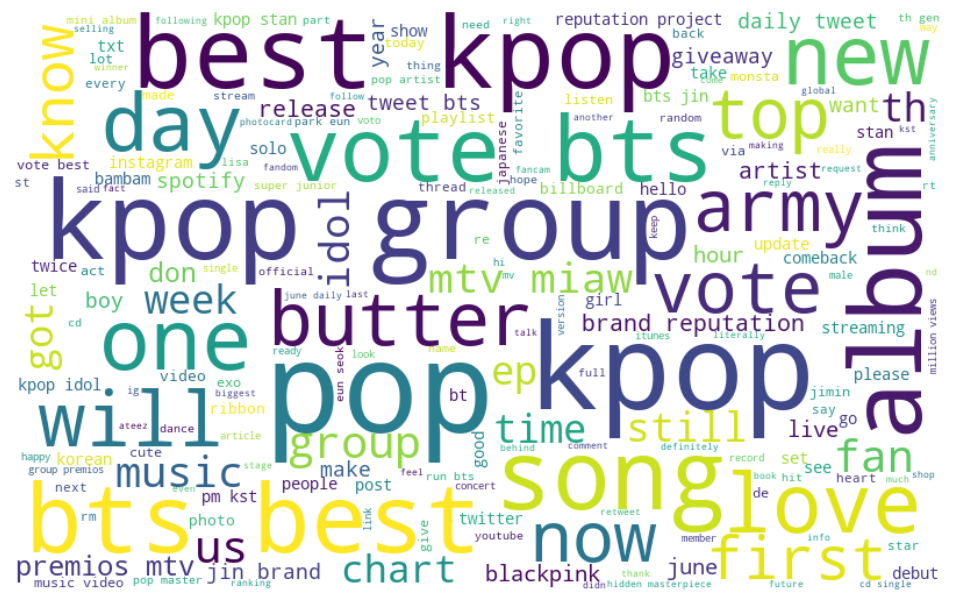

In [21]:
# Start with one review:
allwords = " ".join(review for review in df.Tweet)
stopwords = set(STOPWORDS)
# stopwords = nltk.corpus.stopwords.words('indonesian')

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, stopwords=stopwords, background_color="white").generate(allwords)
plt.figure(dpi=120, figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
# Save the image in the img folder:
wordcloud.to_file("wordcloudkpop.png")

In [23]:
# from collections import Counter
# Counter(" ".join(df.Tweet).split()).most_common(10)

In [24]:
#Stopwords are the English words which does not add much meaning to a sentence.
top_N = 10
words = nltk.tokenize.word_tokenize(allwords)
word_dist = nltk.FreqDist(words)
# print(word_dist)

print('All frequencies word, INCLUDING STOPWORDS:')
print('=' * 60)
result = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(result)
print('=' * 60)

All frequencies word, INCLUDING STOPWORDS:
   Word  Frequency
0   the        452
1   for        265
2  kpop        265
3    to        256
4   and        207
5    of        203
6    on        180
7    is        179
8    in        177
9   bts        171


In [25]:
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

result = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
result

Frequency
Word            
kpop         265
bts          171
pop          131
best         100
group         97
vote          88
album         66
like          58
music         49
one           45